In [ ]:
#The dataset contains a csv file with more than 300 foods each with the amount of Calories, Fats, Proteins, Saturated Fats, Carbohydrates, Fibers labelled for each food. 
#Also, the foods are also categorised into various groups like Desserts, Vegetables, Fruits etc.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("nutrients_csvfile.csv")
df.tail(10)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
325,Wines,1/2 cup,120,164,t,0,0,0,9,"Drinks,Alcohol, Beverages"
326,Table (12.2% alcohol),1/2 cup,120,100,t,0,0,0,5,"Drinks,Alcohol, Beverages"
327,Carbonated drinks Artificially sweetened,12 oz.,346,0,0,0,0,0,0,"Drinks,Alcohol, Beverages"
328,Club soda,12 oz.,346,0,0,0,0,0,0,"Drinks,Alcohol, Beverages"
329,Cola drinks,12 oz.,346,137,0,0,0,0,38,"Drinks,Alcohol, Beverages"
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"
334,Tea,1 cup,230,4,0,t,0,0,1,"Drinks,Alcohol, Beverages"


In [3]:
df['Measure']

0       1 qt.
1       1 qt.
2       1 cup
3       1 cup
4      6 cups
        ...  
330    12 oz.
331    12 oz.
332    12 oz.
333     1 cup
334     1 cup
Name: Measure, Length: 335, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [5]:
df.shape

(335, 10)

In [ ]:
#cleaning and filtering a dataset

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
330    False
331    False
332    False
333    False
334    False
Length: 335, dtype: bool

In [7]:
df["Food"].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
330    False
331    False
332    False
333    False
334    False
Name: Food, Length: 335, dtype: bool

In [8]:
df.describe(include=["O"])

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,335,335,335,334,335,335,333,335,335,335
unique,329,61,103,152,40,45,38,57,80,16
top,Butter,1 cup,100,100,1,t,0,0,0,"Breads, cereals, fastfood,grains"
freq,3,120,38,14,53,115,174,116,45,45


In [9]:
df.loc[91]

Food             Artichoke
Measure            1 large
Grams                  100
Calories              8-44
Protein                  2
Fat                      t
Sat.Fat                  t
Fiber                    2
Carbs                   10
Category    Vegetables A-E
Name: 91, dtype: object

In [10]:
df.sample(10)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
91,Artichoke,1 large,100,8-44,2,t,t,2,10,Vegetables A-E
160,"Turnips, steamed",1 cup,155,40,1,t,0,1.8,9,Vegetables R-Z
90,Tuna,3 oz.,85,170,25,7,3,0,0,"Fish, Seafood"
295,preserves,1 T.,20,55,0,0,0,t,14,"Jams, Jellies"
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
152,"Winter, mashed",1 cup,200,95,4,t,0,2.6,23,Vegetables R-Z
75,Fish sticks fried,5,112,200,19,10,5,0,8,"Fish, Seafood"
100,Beetroots,1 cup,165,1,12,0,NaN,t,0.80,Vegetables A-E
268,Clam chowder,1 cup,255,85,5,2,8,0.50,12,Soups
179,Figs,2,42,120,2,t,0,1.9,30,Fruits A-F


In [11]:
df.replace("t",0,inplace=True)
df.replace("t'",0,inplace=True)
df.replace(",","", regex=True,inplace=True)
df['Fiber']=df['Fiber'].replace("a","", regex=True)
df['Protein']=df['Protein'].replace("-1","0", regex=True)
df['Calories'][91]=44
df['Calories'][136]=80


In [12]:
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products


In [13]:
df.shape

(335, 10)

In [14]:
df['Category']=df['Category'].replace("Vegetables A-E","Vegetables A-Z", regex=True)
df['Category']=df['Category'].replace("Vegetables F-P","Vegetables A-Z", regex=True)
df['Category']=df['Category'].replace("Vegetables R-Z","Vegetables A-Z", regex=True)
df['Category']=df['Category'].replace("Fruits A-F","Fruits A-Z", regex=True)
df['Category']=df['Category'].replace("Fruits G-P","Fruits A-Z", regex=True)
df['Category']=df['Category'].replace("Fruits R-Z","Fruits A-Z", regex=True)
df['Category'].sample(10)

154                   Vegetables A-Z
320                   Seeds and Nuts
127                   Vegetables A-Z
8                     Dairy products
50                      Meat Poultry
27                    Dairy products
231    Breads cereals fastfoodgrains
57                      Meat Poultry
53                      Meat Poultry
90                      Fish Seafood
Name: Category, dtype: object

In [15]:
df.loc[143]

Food        Potatoes pan-tried
Measure                3/4 cup
Grams                      100
Calories                   268
Protein                      4
Fat                         14
Sat.Fat                      6
Fiber                     0.40
Carbs                       33
Category        Vegetables A-Z
Name: 143, dtype: object

In [16]:
df.dtypes

Food        object
Measure     object
Grams       object
Calories    object
Protein     object
Fat         object
Sat.Fat     object
Fiber       object
Carbs       object
Category    object
dtype: object

In [17]:
df.dropna()
df.shape

(335, 10)

In [18]:
df["Food"]=df["Food"].drop_duplicates(keep="first")
df = df.dropna()
df.shape

(326, 10)

In [19]:
df.sample(10)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
124,Iceberg,1/4 head,100,13,0,0,0,0.5,3,Vegetables A-Z
273,Vegetable,1 cup,250,80,4,2,2,0,14,Soups
248,Converted,1 cup,187,677,14,0,0,0.4,142,Breads cereals fastfoodgrains
300,Cherry Pie,1 slice,135,340,3,13,11,0.1,55,Desserts sweets
22,Cream cheese,1 oz.,28,105,2,11,10,0,1,Dairy products
15,Ice milk,1 cup,190,275,9,10,9,0,32,Dairy products
123,Lettuce,1/4 head,100,14,1,0,0,0.5,2,Vegetables A-Z
139,Peppers with beef and crumbs,1 med.,150,255,19,9,8,1,24,Vegetables A-Z
223,White 20 slices or,1-lb. loaf,454,1225,39,15,12,9.00,229,Breads cereals fastfoodgrains
258,Shredded wheat biscuit,1,28,100,3,1,0,0.70,23,Breads cereals fastfoodgrains


In [20]:
column=["Grams","Calories","Protein","Fat","Sat.Fat","Fiber","Carbs"]
def get_numeric(df,column):
    df[column]= pd.to_numeric(df[column])

for i in range(len(column)):
    get_numeric(df,column[i])
    
df.sample

<bound method NDFrame.sample of                      Food Measure  Grams  Calories  Protein  Fat  Sat.Fat  \
0              Cows' milk   1 qt.    976       660       32   40       36   
1               Milk skim   1 qt.    984       360       36    0        0   
2              Buttermilk   1 cup    246       127        9    5        4   
3    Evaporated undiluted   1 cup    252       345       16   20       18   
4          Fortified milk  6 cups   1419      1373       89   42       23   
..                    ...     ...    ...       ...      ...  ...      ...   
330   Fruit-flavored soda  12 oz.    346       161        0    0        0   
331            Ginger ale  12 oz.    346       105        0    0        0   
332             Root beer  12 oz.    346       140        0    0        0   
333                Coffee   1 cup    230         3        0    0        0   
334                   Tea   1 cup    230         4        0    0        0   

     Fiber  Carbs                 Category 

In [21]:
df.dtypes

Food         object
Measure      object
Grams         int64
Calories      int64
Protein       int64
Fat           int64
Sat.Fat       int64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [22]:
grouped_by_cat = df.groupby('Category')
grouped_by_cat 

In [23]:
for group, dataframe in grouped_by_cat :
    print(group)
    print(dataframe[['Category', 'Calories']].head(), '\n-----------------\n')

Breads cereals fastfoodgrains
                          Category  Calories
219  Breads cereals fastfoodgrains       130
220  Breads cereals fastfoodgrains       117
221  Breads cereals fastfoodgrains        60
222  Breads cereals fastfoodgrains        55
223  Breads cereals fastfoodgrains      1225 
-----------------

Dairy products
         Category  Calories
0  Dairy products       660
1  Dairy products       360
2  Dairy products       127
3  Dairy products       345
4  Dairy products      1373 
-----------------

Desserts sweets
            Category  Calories
274  Desserts sweets       150
275  Desserts sweets       374
276  Desserts sweets       110
277  Desserts sweets       420
278  Desserts sweets       160 
-----------------

DrinksAlcohol Beverages
                    Category  Calories
323  DrinksAlcohol Beverages       228
324  DrinksAlcohol Beverages        70
325  DrinksAlcohol Beverages       164
326  DrinksAlcohol Beverages       100
327  DrinksAlcohol Beverages        

In [24]:
for group, dataframe in grouped_by_cat :
    print(group)
    print(dataframe[['Category', 'Calories','Protein']].head(), '\n-----------------\n')

Breads cereals fastfoodgrains
                          Category  Calories  Protein
219  Breads cereals fastfoodgrains       130        3
220  Breads cereals fastfoodgrains       117        3
221  Breads cereals fastfoodgrains        60        2
222  Breads cereals fastfoodgrains        55        2
223  Breads cereals fastfoodgrains      1225       39 
-----------------

Dairy products
         Category  Calories  Protein
0  Dairy products       660       32
1  Dairy products       360       36
2  Dairy products       127        9
3  Dairy products       345       16
4  Dairy products      1373       89 
-----------------

Desserts sweets
            Category  Calories  Protein
274  Desserts sweets       150        1
275  Desserts sweets       374       11
276  Desserts sweets       110        3
277  Desserts sweets       420        5
278  Desserts sweets       160        3 
-----------------

DrinksAlcohol Beverages
                    Category  Calories  Protein
323  DrinksAlcohol Be

In [25]:
df['Calories'].max()

1373

In [26]:
df['Calories'].min()

0

In [27]:
df['Calories'].median()

133.5

In [28]:
df['Calories']

0       660
1       360
2       127
3       345
4      1373
       ... 
330     161
331     105
332     140
333       3
334       4
Name: Calories, Length: 326, dtype: int64

In [29]:
high_cal=df.copy()
high_cal

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0.0,13.0,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0.0,42.0,DrinksAlcohol Beverages
331,Ginger ale,12 oz.,346,105,0,0,0,0.0,28.0,DrinksAlcohol Beverages
332,Root beer,12 oz.,346,140,0,0,0,0.0,35.0,DrinksAlcohol Beverages
333,Coffee,1 cup,230,3,0,0,0,0.0,1.0,DrinksAlcohol Beverages


In [30]:
cal_mask = df['Calories'] >100
high_cal = df[cal_mask]
high_cal.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0.0,13.0,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119.0,Dairy products


In [31]:
high_cal.shape

(210, 10)

In [32]:
high_cal['Category']

0               Dairy products
1               Dairy products
2               Dairy products
3               Dairy products
4               Dairy products
                ...           
325    DrinksAlcohol Beverages
329    DrinksAlcohol Beverages
330    DrinksAlcohol Beverages
331    DrinksAlcohol Beverages
332    DrinksAlcohol Beverages
Name: Category, Length: 210, dtype: object

In [33]:
low_cal=df.copy()
low_cal

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0.0,13.0,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0.0,42.0,DrinksAlcohol Beverages
331,Ginger ale,12 oz.,346,105,0,0,0,0.0,28.0,DrinksAlcohol Beverages
332,Root beer,12 oz.,346,140,0,0,0,0.0,35.0,DrinksAlcohol Beverages
333,Coffee,1 cup,230,3,0,0,0,0.0,1.0,DrinksAlcohol Beverages


In [34]:
call_mask = df['Calories'] <=100
low_cal = df[call_mask]
low_cal.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
20,Cheddar,1-in. cube,17,70,4,6,5,0.0,0.0,Dairy products
29,Butter,1T.,14,100,0,11,10,0.0,0.0,Fats Oils Shortenings
35,Margarine 2 pat or,1 T.,14,100,0,11,9,0.0,0.0,Fats Oils Shortenings
40,French dressing,1 T.,15,60,0,6,2,0.0,2.0,Fats Oils Shortenings
41,Thousand Island sauce,1 T.,15,75,0,8,3,0.0,1.0,Fats Oils Shortenings


In [35]:
low_cal.shape

(116, 10)

In [36]:
low_cal['Category']

20              Dairy products
29       Fats Oils Shortenings
35       Fats Oils Shortenings
40       Fats Oils Shortenings
41       Fats Oils Shortenings
                ...           
326    DrinksAlcohol Beverages
327    DrinksAlcohol Beverages
328    DrinksAlcohol Beverages
333    DrinksAlcohol Beverages
334    DrinksAlcohol Beverages
Name: Category, Length: 116, dtype: object

<Axes: title={'center': 'top 20 protein food by all categories'}, xlabel='Food'>

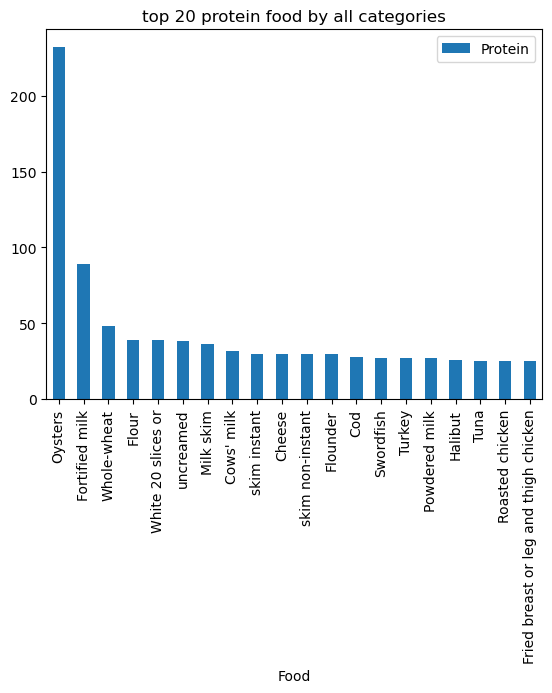

In [37]:
protein_rich=high_cal.sort_values(by='Protein',ascending=False)
prot20=protein_rich.head(20)
prot20.plot(kind="bar", x='Food',y='Protein',title='top 20 protein food by all categories')



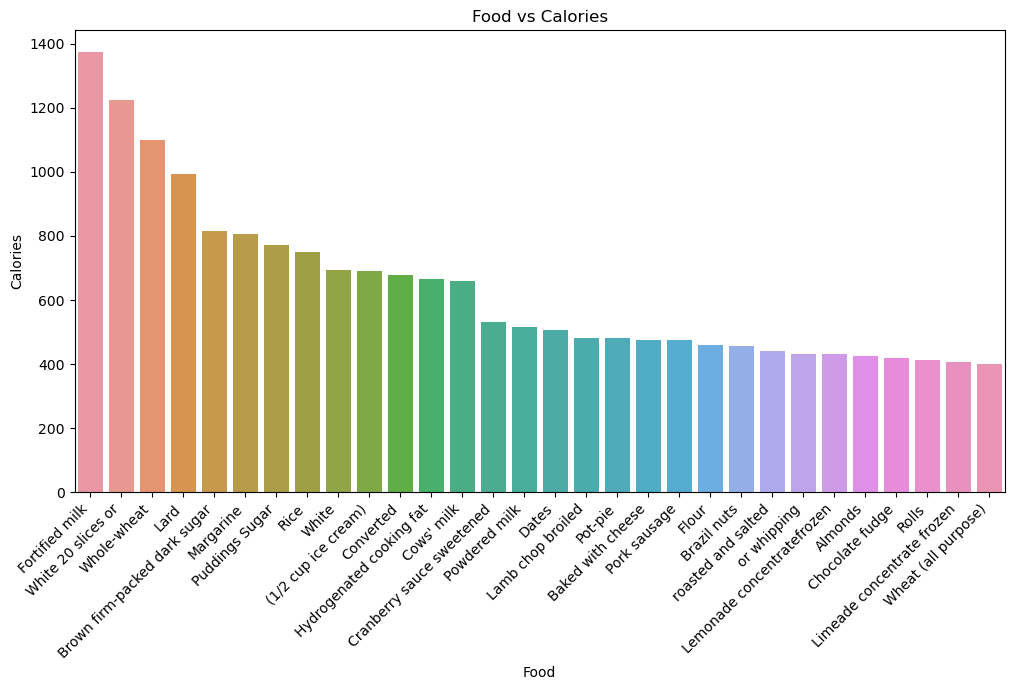

In [38]:
cal_rich=high_cal.sort_values(by='Calories',ascending=False)
cal20=cal_rich.head(30)
plt.figure(figsize=(12, 6))
sns.barplot(x='Food', y='Calories', data=cal20, order=cal20['Food'])
plt.title('Food vs Calories')
plt.xlabel('Food')
plt.ylabel('Calories')
plt.xticks(rotation=45, ha='right')
plt.show()

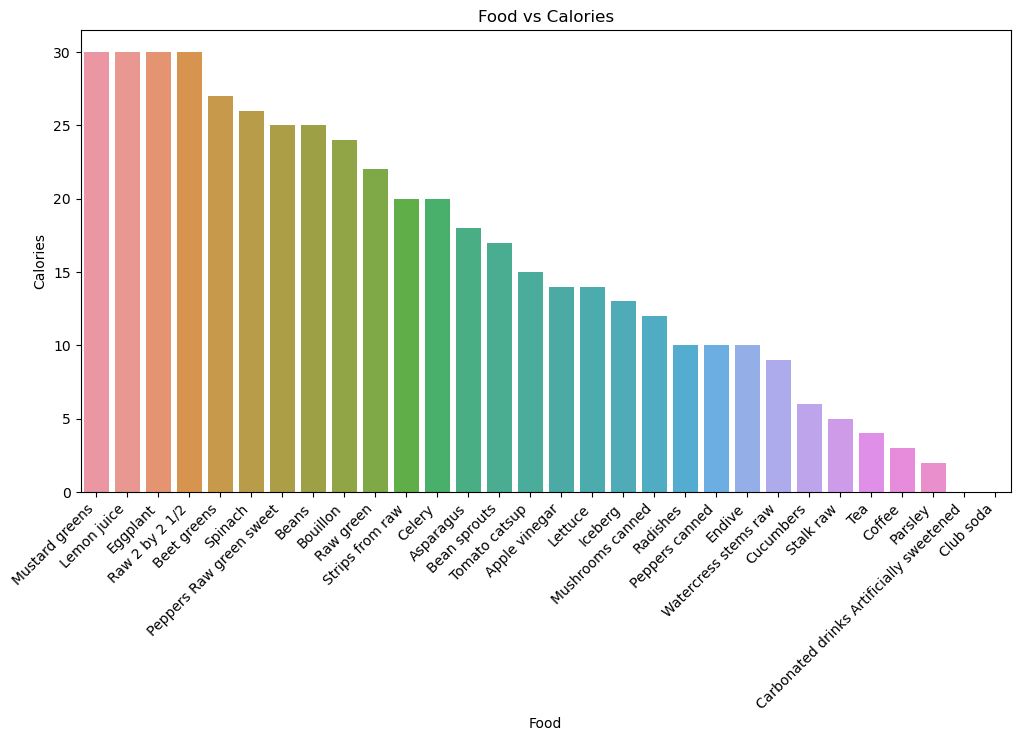

In [39]:
cal_low=low_cal.sort_values(by='Calories',ascending=False)
call20=cal_low.tail(30)
plt.figure(figsize=(12, 6))
sns.barplot(x='Food', y='Calories', data=call20, order=call20['Food'])
plt.title('Food vs Calories')
plt.xlabel('Food')
plt.ylabel('Calories')
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
sns.set(style="whitegrid")

In [80]:
def plot_comparisons(df, column, plot_type):
    plt.figure(figsize=(10, 6))
 
    if plot_type == 'histogram':
        sns.histplot(data=df, x=column, hue="Category", element="step", stat="density", common_norm=False)
    plt.title(f'Comparison of {column} Among Category')
    plt.ylabel(column if plot_type != 'bar' else 'Count')
    plt.xlabel('Category')
    plt.show()

In [82]:
columns_to_plot = ['Calories']
plot_types = ['histogram']

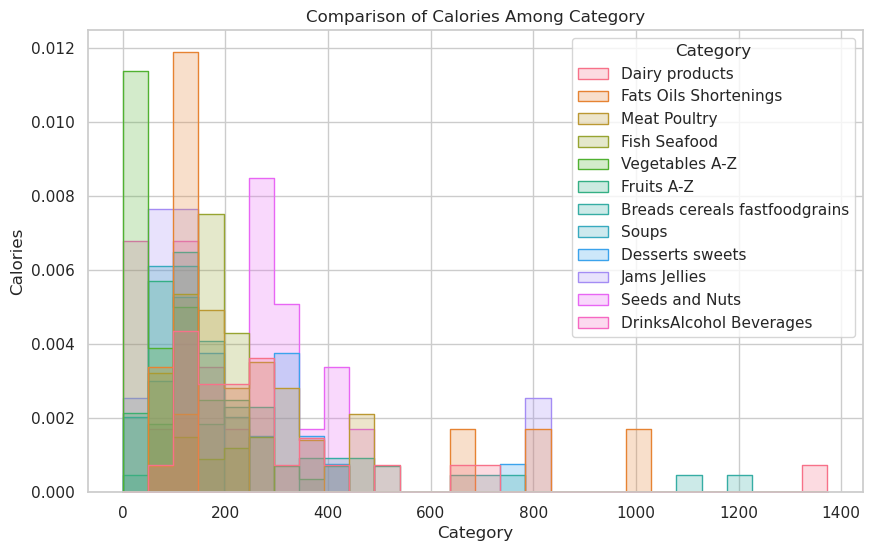

In [84]:
for column, plot_type in zip(columns_to_plot, plot_types):
    plot_comparisons(df, column, plot_type)

In [97]:
average_carbs_per_category = df.groupby('Category')['Carbs'].mean().reset_index()
print(average_carbs_per_category)

                         Category      Carbs
0   Breads cereals fastfoodgrains  46.545455
1                  Dairy products  23.250000
2                 Desserts sweets  42.592593
3         DrinksAlcohol Beverages  13.916667
4           Fats Oils Shortenings   0.250000
5                    Fish Seafood  13.842105
6                      Fruits A-Z  37.561404
7                    Jams Jellies  43.125000
8                    Meat Poultry   1.975862
9                  Seeds and Nuts  11.666667
10                          Soups  15.500000
11                 Vegetables A-Z  13.897059


Text(0.5, 1.0, 'Carbohydrate Distribution per Categories')

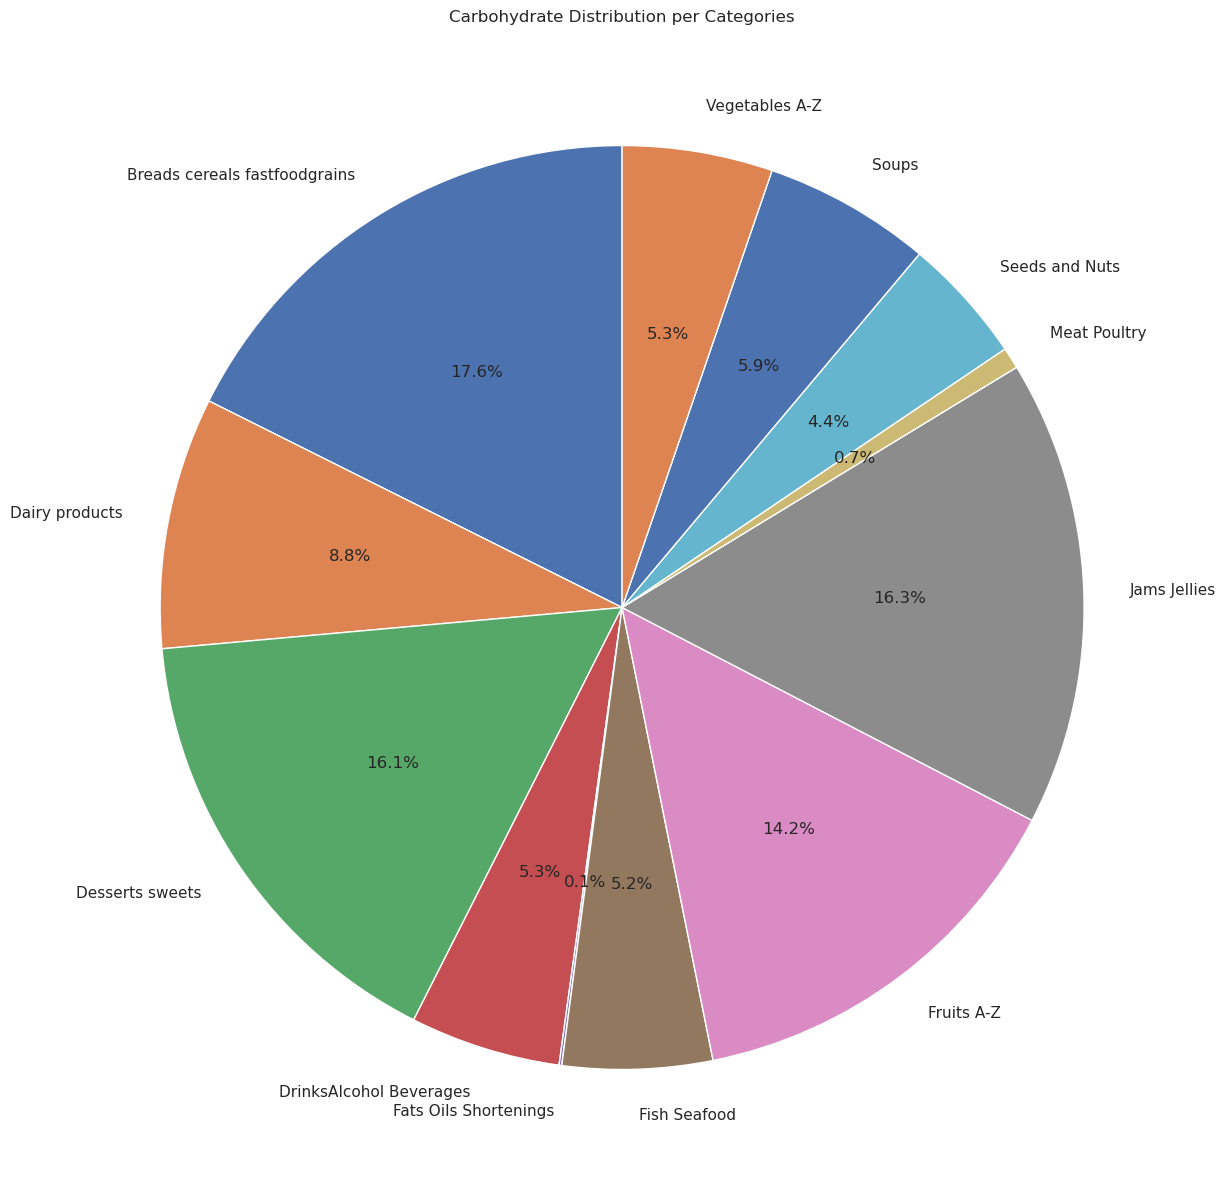

In [170]:
plt.figure(figsize=(15, 15))
plt.pie(average_carbs_per_category['Carbs'], labels=average_carbs_per_category['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Carbohydrate Distribution per Categories')